In [60]:
import wrangle as wr

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr

from sklearn.feature_selection import SelectKBest, RFE, f_regression

In [6]:
train, val, test = wr.wrangle_zillow()

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-289.0
<class 'numpy.float64'>
-444583.125


In [7]:
test


,bedrooms,bathrooms,area,tax_value,fips,sale_date
765,3.0,1.0,1648.0,27699.0,6037.0,2017-01-06
4213,4.0,3.0,3406.0,833000.0,6059.0,2017-01-29
25700,4.0,2.0,1705.0,543000.0,6059.0,2017-05-19
27773,3.0,2.0,1452.0,333087.0,6037.0,2017-05-30
30495,3.0,2.0,1790.0,261424.0,6037.0,2017-06-09
...,...,...,...,...,...,...
31662,3.0,2.0,1241.0,445173.0,6111.0,2017-06-15
14422,4.0,3.0,2616.0,264849.0,6037.0,2017-03-29
1822,2.0,1.0,1174.0,155395.0,6037.0,2017-01-12
16615,2.0,1.0,1283.0,139846.0,6037.0,2017-04-07


In [12]:
x_train = train.drop(columns= ['tax_value', 'fips', 'sale_date'])
y_train = train['tax_value']

In [13]:
x_train
y_train

31478    147333.0
30505    475000.0
44417     37645.0
36508     75122.0
17712    658896.0
           ...   
49333    300000.0
25047    380000.0
23483    331462.0
44163    428006.0
10852     73054.0
Name: tax_value, Length: 26073, dtype: float64

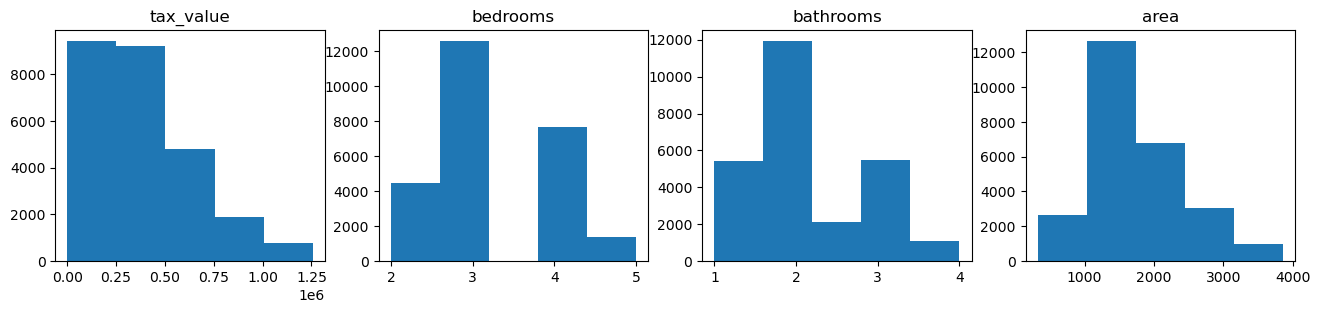

In [20]:
plt.figure(figsize=(16, 3))

cols = ['tax_value', 'bedrooms', 'bathrooms', 'area']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

# Explore 

## Q1 What is the relationship bedrooms and tax_value?


#### H$_ø$: There is no realationship between bedrooms and tax_value
#### H$_a$: There is a relationshop between bedrroms and tax_value

In [26]:
corr = train.drop(columns=['sale_date', 'fips']).corr(method='spearman')
corr

,bedrooms,bathrooms,area,tax_value
bedrooms,1.000000,0.579088,0.620667,0.212322
bathrooms,0.579088,1.000000,0.800981,0.394542
area,0.620667,0.800981,1.000000,0.430643
tax_value,0.212322,0.394542,0.430643,1.000000


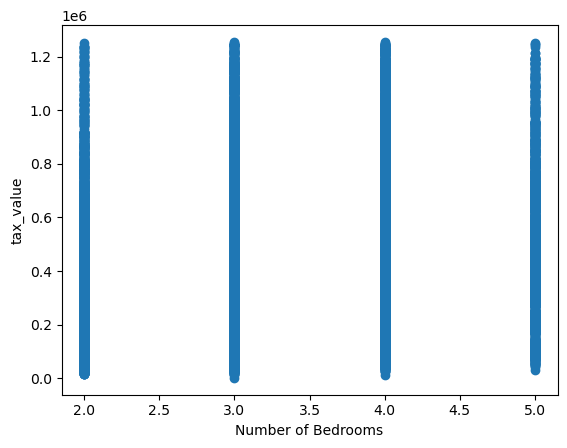

In [23]:
plt.scatter(train.bedrooms, train.tax_value)
plt.xlabel("Number of Bedrooms")
plt.ylabel("tax_value")
plt.show()

<AxesSubplot:>

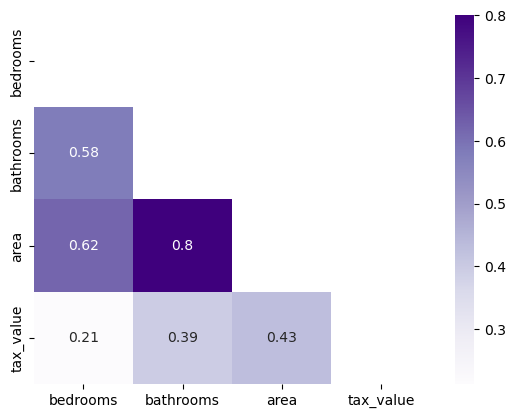

In [30]:
sns.heatmap(corr,
           cmap='Purples',
           annot=True,
           mask=np.triu(corr))

In [31]:
r, p = spearmanr(train['bedrooms'], train['tax_value'])

In [32]:
if p < 0.05:
    print('We can reject our null hypothesis!')
else:
    print('We failed ro reject the null hypothesis!')

We can reject our null hypothesis!


In [33]:
r

0.21232231429211643

In [34]:
p

1.665954194223961e-263

### Answer
- with a P value that low we can safely say that there is a relationship between bedrooms and tax value

### Q2 Is there a realationship between bathrooms and tax_value

#### H$_ø$: There is no realationship between bathrooms and tax_value
#### H$_a$: There is a relationshop between bathrooms and tax_value

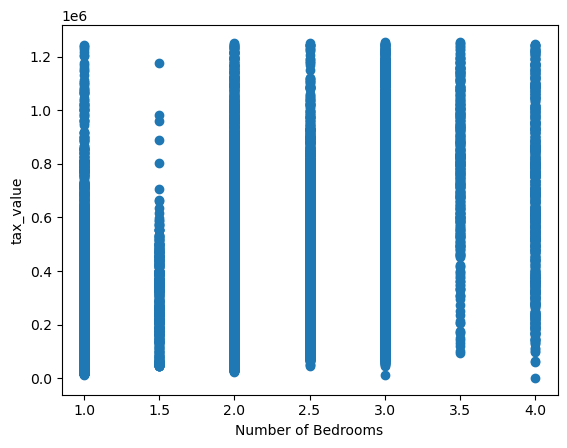

In [35]:
plt.scatter(train.bathrooms, train.tax_value)
plt.xlabel("Number of Bedrooms")
plt.ylabel("tax_value")
plt.show()

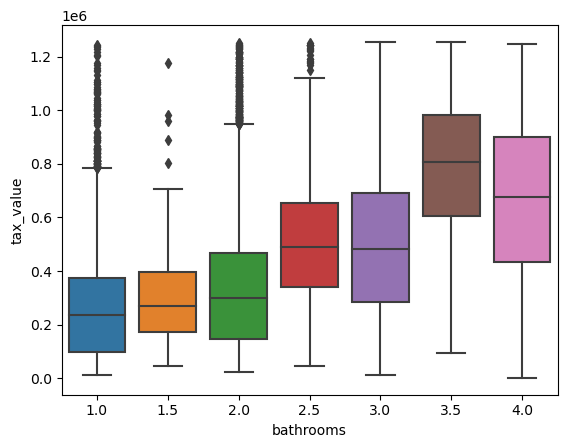

In [38]:
sns.boxplot(data=train, x='bathrooms', y='tax_value')
plt.show()

- lots of outliers with bathroom count from 1 - 2.5
- area could be and location could be skewing these outliers
- will check relationship between bathrooms and area next


In [39]:
r, p = spearmanr(train['bathrooms'], train['tax_value'])

if p < 0.05:
    print('We can reject our null hypothesis!')
else:
    print('We failed ro reject the null hypothesis!')

We can reject our null hypothesis!


In [41]:
r

0.394542210251

In [40]:
p

0.0

- can safely say that there is a relationship between bathrooms and tax value 

## Q3 relationship between area and bathrooms?

#### H$_ø$: There is no realationship between bathrooms and tax_value
#### H$_a$: There is a relationshop between bathrooms and tax_value

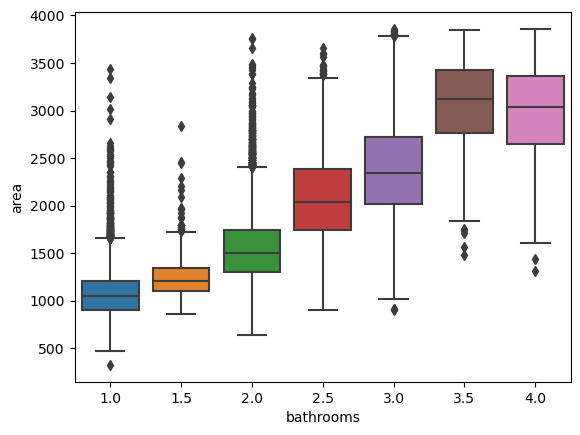

In [44]:
sns.boxplot(data=train, x='bathrooms', y='area')
plt.show()

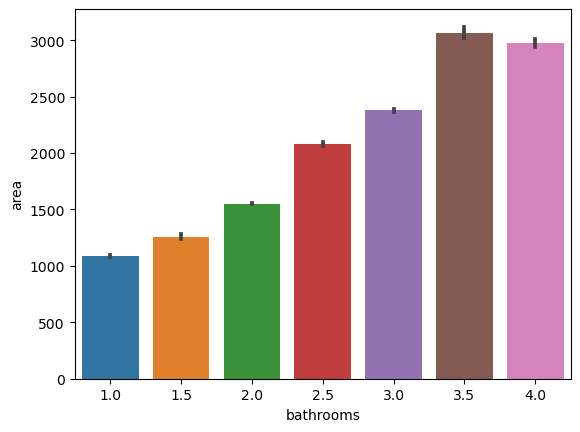

In [49]:
sns.barplot(data=train, x='bathrooms', y='area')
plt.show()

In [45]:
r, p = spearmanr(train['bathrooms'], train['area'])

if p < 0.05:
    print('We can reject our null hypothesis!')
else:
    print('We failed ro reject the null hypothesis!')

We can reject our null hypothesis!


In [46]:
r

0.8009813508460654

In [47]:
p

0.0

#### There is a really high correlation between area and bathrooms
- might get data poison in my model if I use them both as features

## Q4 What is the realtion between area and tax value?

#### H$_ø$: There is no realationship between area and tax_value
#### H$_a$: There is a relationshop between area and tax_value

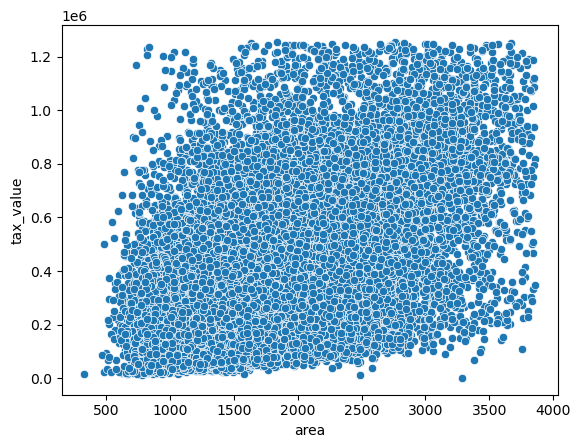

In [54]:
sns.scatterplot(data=train, x='area', y='tax_value')
plt.show()

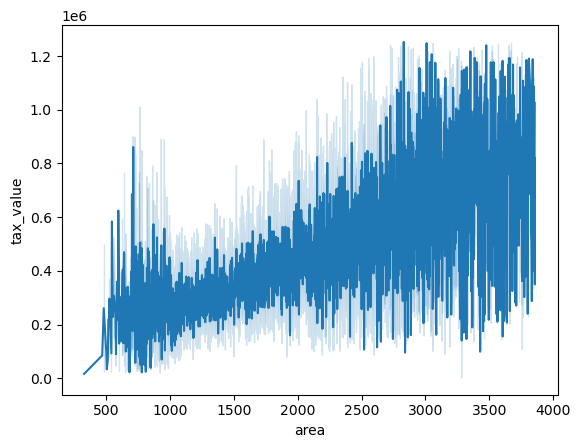

In [56]:
sns.lineplot(data=train, x='area', y='tax_value')
plt.show()

- looks to have correlation. 
- as area increases so does the tax value

In [57]:
r, p = spearmanr(train['area'], train['tax_value'])

if p < 0.05:
    print('We can reject our null hypothesis!')
else:
    print('We failed ro reject the null hypothesis!')

We can reject our null hypothesis!


In [58]:
r

0.43064331653991156

In [59]:
p

0.0

- All my features have correlation with the target
- gonna move on to modeling using all of them 
- may drop bathrooms becasue of the correlation with area

### Lets see what select k best says

In [61]:
def select_kbest(X, y, k=2):
    '''
    X: dataframe of independent features
    y: single pandas Series (a target)
    k: kwarg, a number of k best features to select
    '''
    # make our kbest object:
    kbest = SelectKBest(f_regression, k=k)
    # fit it from x and y's relationships
    kbest.fit(X, y)
    # get the support values:
    mask = kbest.get_support()
    return X.columns[mask]

In [67]:
kbest = select_kbest(x_train, y_train, 2)
kbest

Index(['bathrooms', 'area'], dtype='object')